In [5]:

import sys
sys.path.append('..')

import torch
from src.models.autoencoder import BasicAutoencoderKL
import numpy as np

ddconfig = {
    "double_z": True,
    "z_channels": 4,
    "resolution": 512,
    "in_channels": 5,
    "out_ch": 5,
    "ch": 128,
    "ch_mult": [1, 2, 4, 8],
    "num_res_blocks": 2,
    "attn_resolutions": [],
    "dropout": 0.0
}

lossconfig = {"target": "torch.nn.Identity"}

vae = BasicAutoencoderKL(
    ddconfig=ddconfig,
    lossconfig=lossconfig,
    embed_dim=4,
    ckpt_path="../models/vae/vae.ckpt"  # Using the provided checkpoint path
)
vae.eval()  # Set to evaluation mode

making attention of type 'vanilla' with 1024 in_channels
Working with z of shape (1, 4, 64, 64) = 16384 dimensions.
making attention of type 'vanilla' with 1024 in_channels
Restored VAE from ../models/vae/vae.ckpt


BasicAutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(5, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0): Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (1): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          

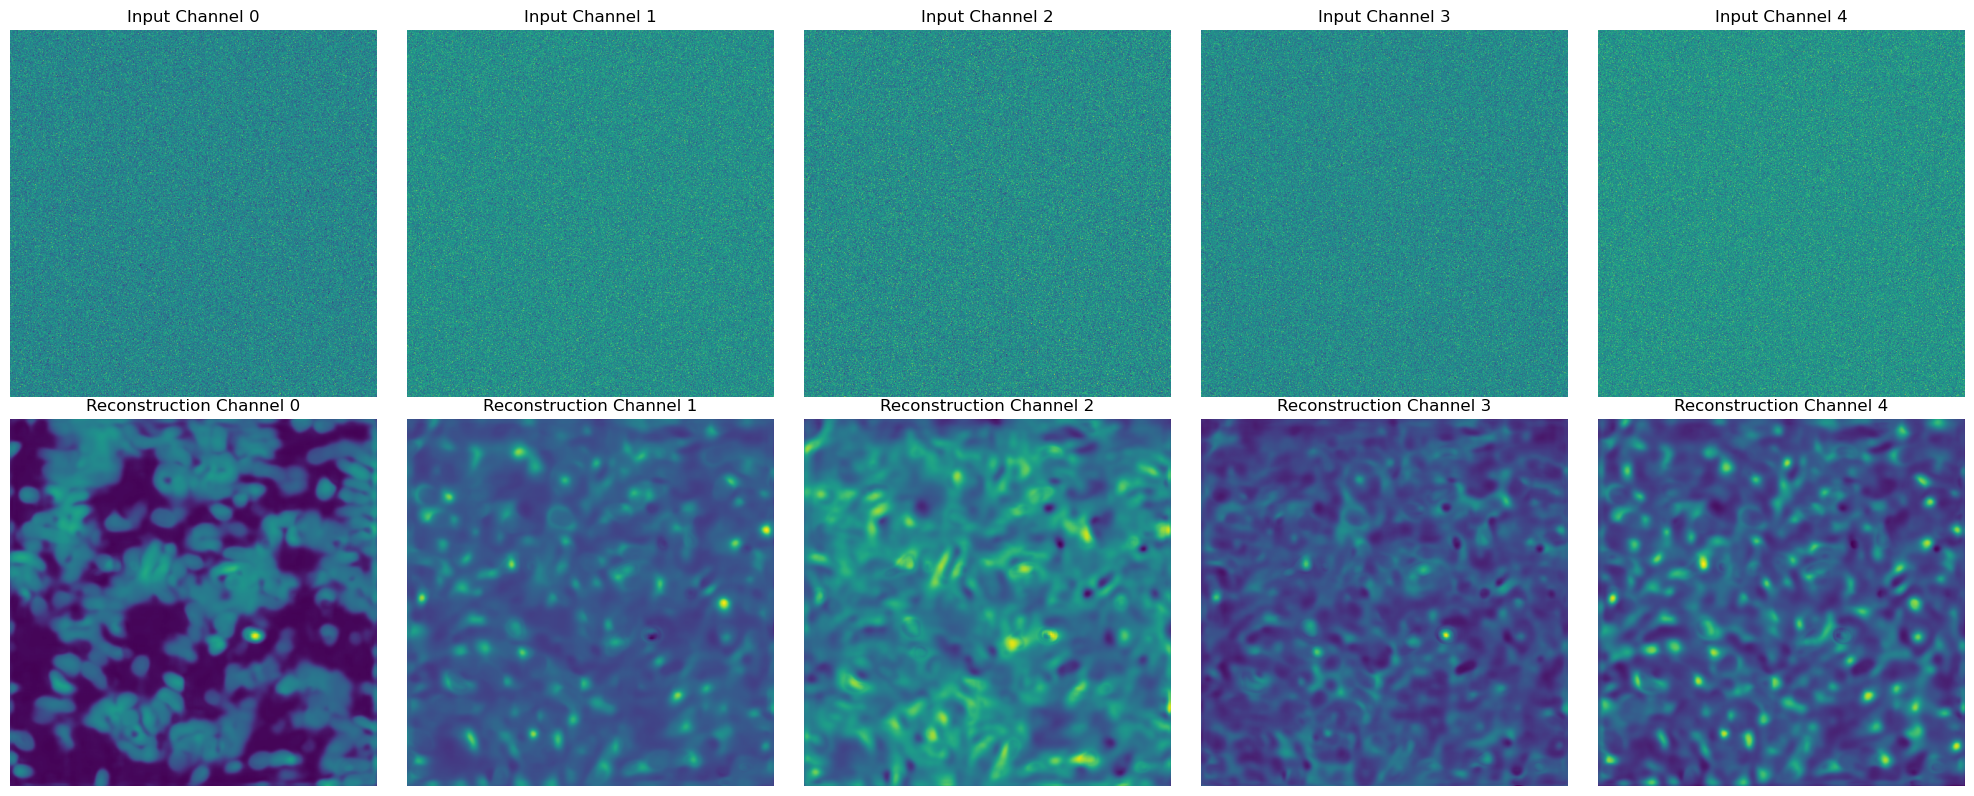

In [8]:
import matplotlib.pyplot as plt
# Create a sample input (batch_size=1, channels=5, height=512, width=512)
sample_input = torch.randn(1, 5, 512, 512)

with torch.no_grad():
    posterior = vae.encode(sample_input)
    latents = posterior.sample()
    reconstruction = vae.decode(latents)

    # Create a figure with 5 columns (one per channel) and 2 rows (input/output)
    plt.figure(figsize=(20, 8))
    
    for i in range(5):
        # Plot original channel
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_input[0, i].numpy())
        plt.title(f'Input Channel {i}')
        plt.axis('off')
        
        # Plot reconstructed channel
        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstruction[0, i].numpy())
        plt.title(f'Reconstruction Channel {i}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()